In [5]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

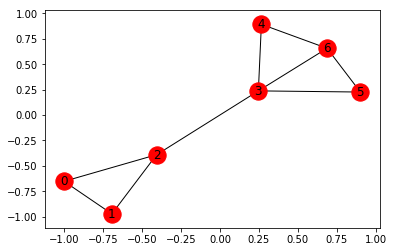

In [17]:
G = nx.complete_graph(3)
G.add_edges_from([(2, 3), (3, 4), (3, 6), (3,5), (4, 6), (5,6)])
nx.draw_networkx(G)

In [18]:
maximal_cliques_of_G = list(nx.find_cliques(G))
maximal_cliques_of_G

[[0, 1, 2], [3, 2], [3, 6, 4], [3, 6, 5]]

In [19]:
def make_first_structure_vector(list_of_maximal_cliques):
    
    list_of_q_connected_components_at_qth_levels = [] #qth entry is the list of q-connected components
    
    q_max = np.max([len(x) for x in list_of_maximal_cliques])-1 
    
    for q in range(q_max+1):
        
        temp_list_of_max_cliques = list_of_maximal_cliques.copy()
        q_connected_at_this_level = []
        
        temp_list_of_max_cliques = [x for x in temp_list_of_max_cliques if len(x)>q]

        while temp_list_of_max_cliques != []:
            temp_list = []

            temp_list.append(temp_list_of_max_cliques[0])
            temp_list_of_max_cliques.remove(temp_list_of_max_cliques[0])
                        
            counter_for_check = -1
            while len(temp_list)>counter_for_check:
                counter_for_check = len(temp_list)
                for clique in temp_list_of_max_cliques:
                    if len(clique) == q:
                        temp_list_of_max_cliques.remove(clique)

                    if any([len(list(set(clique_for_eval)&set(clique))) == q+1 for clique_for_eval in temp_list]):
                        temp_list.append(clique)
                        temp_list_of_max_cliques.remove(clique)
            q_connected_at_this_level.append(temp_list)
            
        list_of_q_connected_components_at_qth_levels.append(q_connected_at_this_level)
    
    Q_vector = [len(x) for x in list_of_q_connected_components_at_qth_levels]
    
    return Q_vector, list_of_q_connected_components_at_qth_levels

In [20]:
Q_vector, q_connected_components = make_first_structure_vector(maximal_cliques_of_G)

print("The Q_vector is",Q_vector)
for index in range(len(q_connected_components)):
    print("The {}^th connected components at the {}^th level is {}".format(index, index, q_connected_components[index]), end="\n" )

The Q_vector is [1, 3, 3]
The 0^th connected components at the 0^th level is [[[0, 1, 2], [3, 2], [3, 6, 5], [3, 6, 4]]]
The 1^th connected components at the 1^th level is [[[0, 1, 2]], [[3, 2]], [[3, 6, 4], [3, 6, 5]]]
The 2^th connected components at the 2^th level is [[[0, 1, 2]], [[3, 6, 4]], [[3, 6, 5]]]


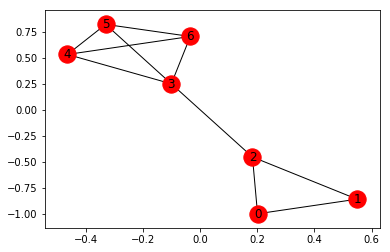

In [21]:
G1 = G.copy()
G1.add_edge(4, 5)
maximal_cliques_of_G1 = list(nx.find_cliques(G1))
nx.draw_networkx(G1)

In [22]:
Q_vector_of_G1, q_connected_components_f_G1 = make_first_structure_vector(maximal_cliques_of_G1)

print("The Q_vector is",Q_vector)
for index in range(len(q_connected_components)):
    print("The {}^th connected components at the {}^th level is {}".format(index, index, q_connected_components[index]), end="\n" )

The Q_vector is [1, 3, 3]
The 0^th connected components at the 0^th level is [[[0, 1, 2], [3, 2], [3, 6, 5], [3, 6, 4]]]
The 1^th connected components at the 1^th level is [[[0, 1, 2]], [[3, 2]], [[3, 6, 4], [3, 6, 5]]]
The 2^th connected components at the 2^th level is [[[0, 1, 2]], [[3, 6, 4]], [[3, 6, 5]]]


In [23]:
def make_axuillary_vector(list_of_maximal_cliques):
    q_max = np.max([len(x) for x in list_of_maximal_cliques])-1 
    f_hat_vector = []
    for q in range(q_max+1):
        f_hat_vector.append(len([len(clique) for clique in list_of_maximal_cliques if len(clique)==q+1]))
    return f_hat_vector

def make_second_structure_vector(list_of_maximal_cliques):
    q_max = np.max([len(x) for x in list_of_maximal_cliques])-1 
    f_hat_vector = make_axuillary_vector(list_of_maximal_cliques)
    
    N_vector = []
    
    for index in range(len(f_hat_vector)):
        N_vector.append(sum(f_hat_vector[index:]))
    return N_vector

def make_third_structure_vector(N_vector, Q_vector):
    
    if len(N_vector) != len(Q_vector):
        print("mismatch of the length of the vectors")
    Q_hat_vector = []
    for index in range(len(N_vector)):
        q_hat = (1 - (Q_vector[index] / N_vector[index]))
        Q_hat_vector.append(q_hat)
    return Q_hat_vector

In [24]:
f_hat_vector = make_axuillary_vector(maximal_cliques_of_G)
N_vector = make_second_structure_vector(maximal_cliques_of_G)
Q_hat_vector = make_third_structure_vector(N_vector, Q_vector)

In [25]:
print("The first structure vector of G is: ", Q_vector)
print("The axuillary vector of G is: ", f_hat_vector)
print("The second structure vector of G is: ", N_vector)
print("The third sturcture vector of G is: ", Q_hat_vector)

The first structure vector of G is:  [1, 3, 3]
The axuillary vector of G is:  [0, 1, 3]
The second structure vector of G is:  [4, 4, 3]
The third sturcture vector of G is:  [0.75, 0.25, 0.0]
